In [486]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [-1, 5, 10, 15],  # Maximum depth of the trees
    'num_leaves': [31, 50, 100],  # Number of leaves in one tree
    'min_child_samples': [10, 20, 30],  # Minimum samples in a leaf
    'subsample': [0.8, 1.0],  # Subsample ratio
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [0, 0.1, 0.5]  # L2 regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),  # Using negative MSE as the scoring metric
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters for LightGBM:", grid_search.best_params_)
print("Best Score (negative MSE) for LightGBM:", grid_search.best_score_)

# Use the best estimator to predict
best_lgb_model = grid_search.best_estimator_
y_pred_lgb_tuned = best_lgb_model.predict(X_test)

# Evaluate the tuned model
mae_lgb_tuned = mean_absolute_error(y_test, y_pred_lgb_tuned)
mse_lgb_tuned = mean_squared_error(y_test, y_pred_lgb_tuned)
rmse_lgb_tuned = np.sqrt(mse_lgb_tuned)
r2_lgb_tuned = r2_score(y_test, y_pred_lgb_tuned)

print(f'Tuned LightGBM Regressor - MAE: {mae_lgb_tuned:.2f}')
print(f'Tuned LightGBM Regressor - MSE: {mse_lgb_tuned:.2f}')
print(f'Tuned LightGBM Regressor - RMSE: {rmse_lgb_tuned:.2f}')
print(f'Tuned LightGBM Regressor - R2 Score: {r2_lgb_tuned:.2f}')


Fitting 5 folds for each of 11664 candidates, totalling 58320 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9791
[LightGBM] [Info] Number of data points in the train set: 31715, number of used features: 66
[LightGBM] [Info] Start training from score 7.477650
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

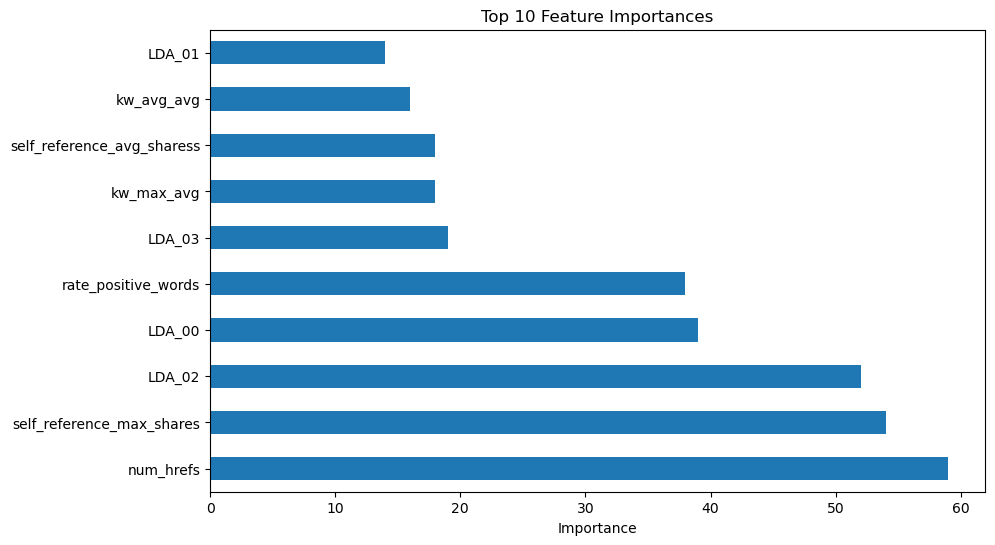

In [490]:
# Plot feature importance
feature_importances = pd.Series(best_lgb_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.drop('shares')
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.show()

In [494]:
print(best_lgb_model)

LGBMRegressor(learning_rate=0.05, max_depth=10, random_state=42, reg_alpha=0.5,
              reg_lambda=0, subsample=0.8)


In [500]:
from sklearn.model_selection import cross_val_score

# Check for duplicate columns
X = X.loc[:, ~X.columns.duplicated()]  # Keep only the first occurrence of each column

# Perform cross-validation
cv_scores = cross_val_score(best_lgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate and print the average RMSE
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {np.mean(cv_rmse):.2f} ± {np.std(cv_rmse):.2f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9532
[LightGBM] [Info] Number of data points in the train set: 31715, number of used features: 64
[LightGBM] [Info] Start training from score 7.462652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [504]:
# Assume X_new is a new dataset (as a NumPy array or DataFrame) with the same features as X_train
y_new_pred = best_lgb_model.predict(X_train)

# Display or save predictions
print(y_new_pred)


[9.65867674 6.24704273 7.17276231 ... 7.00680669 7.31488624 6.72662839]
